In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def EulerStep(s, t, derivs, dt):
    return s + derivs(s,t)*dt

def SymplecticEulerStep(s, t, derivs, dt):
    s1 = s + derivs(s,t,0)*dt     #  q-step
    return s1 + derivs(s1,t,1)*dt #  p-step


In [4]:
k=1.0
m=1.0

def derivs_sho(s, t, step=None):
    """
    Simple harmonic oscillator derivs for symplectic and non-symplectic
    """
    n=int(len(s)/2)  # the first half of s is 'q', second half 'p'
    v=s[n:]
    
    if step==0:
        return append(v, zeros(n))  # for q-steps, just update the position
    else:
        x=s[:n] # only compute x and a if we need it.
        a=-k*x/m
        if step is None: # it must be an RK4 step
            return append(v,a)
        else: # velocity step
            return append(zeros(n),a) # for p-steps, just updated the velocity


/home/gil/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


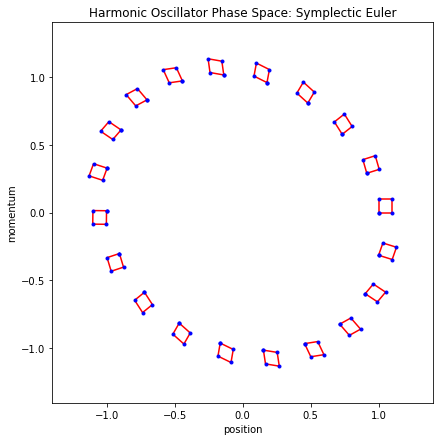

In [5]:
rcParams['figure.figsize']=(7.,7.)
DO_SYMPLECTIC=True  # Change "DO_SYMPLECTIC" to True or False to switch between
                     # SymplecticEuler and Euler "step" functions.

delta=0.1 # how far apart in phase space are the points

s0= array([1.0,0.0])
s1=s0 + array([delta, 0])
s2=s0 + array([delta,delta])
s3=s0 + array([0, delta])  # five points in phase space

t = 0.0
dt = pi/10

s = array(list(flatten(array([s0,s1,s2,s3,s0]).T)))  # state of four objects -> [x1,x2,x3,x4,v1,v2,v3,v4]
n = int(len(s)/2)
clf()

if DO_SYMPLECTIC:
    title("Harmonic Oscillator Phase Space: Symplectic Euler")
    wsize=1.4
else:
    title("Harmonic Oscillator Phase Space: Euler")
    wsize=2.5
    
axes().set_aspect('equal')
axis([-wsize,wsize,-wsize,wsize])
xlabel("position")
ylabel("momentum")
plot(s[:n], s[n:], 'r-',s[:n],s[n:],'b.')

while t<1.9*pi:
    if DO_SYMPLECTIC:
        s=SymplecticEulerStep(s, t, derivs_sho, dt)
    else:
        s=EulerStep(s, t, derivs_sho, dt)
    t+=dt
    plot(s[:n], s[n:], 'r-',s[:n],s[n:],'b.')
        